In [2]:
import pandas as pd
import csv
import random
import math

In [ ]:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor, and maintain your system.

### 1. Load data

The first thing we need to do is load our data file

In [57]:
path = "./pima-indians-diabetes.data.csv"

In [58]:
def loadCsv(path):
    lines = csv.reader(open(path))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [61]:
dataset = loadCsv(path)

In [18]:
dataset

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0, 0.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0, 1.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0, 0.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0, 1.0],
 [5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0, 0.0],
 [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0, 1.0],
 [10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0, 0.0],
 [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0, 1.0],
 [8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0, 1.0],
 [4.0, 110.0, 92.0, 0.0, 0.0, 37.6, 0.191, 30.0, 0.0],
 [10.0, 168.0, 74.0, 0.0, 0.0, 38.0, 0.537, 34.0, 1.0],
 [10.0, 139.0, 80.0, 0.0, 0.0, 27.1, 1.441, 57.0, 0.0],
 [1.0, 189.0, 60.0, 23.0, 846.0, 30.1, 0.398, 59.0, 1.0],
 [5.0, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0, 1.0],
 [7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0, 1.0],
 [0.0, 118.0, 84.0, 47.0, 230.0, 45.8, 0.551, 31.0, 1.0],
 [7.0, 107.0, 74.0, 0.0, 0.0, 29.6, 0.254, 31.0

In [23]:
pdfData = pd.read_csv(path)
print(pdfData.shape)

(767, 9)


In [19]:
len(dataset)

768

### 2. Summarize data

The first task is to separate the training dataset instances by class value so that we can calculate statistics for each class.

In [62]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [63]:
dataset = [[1], [2], [3], [4], [5]]
splitRatio = 0.67 # (2/1)
train, test = splitDataset(dataset, splitRatio)
print('Split {0} rows into train with {1} and test with {2}'.format(len(dataset), train, test))

Split 5 rows into train with [[1], [3], [5]] and test with [[2], [4]]


In [64]:
# Label is the las value in the vector
# Separated by label
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [65]:
dataset = [[1,20,1], [2,21,0], [3,22,1]]
separated = separateByClass(dataset)
print('Separated instances: {0}'.format(separated))

Separated instances: {1: [[1, 20, 1], [3, 22, 1]], 0: [[2, 21, 0]]}


#### Data Distribution for the Dataset

We need to calculate the mean of each attribute for a class value. The mean is the central middle or central tendency of the data, and we will use it as the middle of our gaussian distribution when calculating probabilities.

In [66]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [67]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [68]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [36]:
## Print out (mean, std) value for each class 
dataset = [[1,20,1], [2,21,0], [3,22,1], [4,22,0]]
summary = summarizeByClass(dataset)
print('Summary by class value: (class:\n{0}'.format(summary))

Summary by class value: 
{1: [(2.0, 1.4142135623730951), (21.0, 1.4142135623730951)], 0: [(3.0, 1.4142135623730951), (21.5, 0.7071067811865476)]}


In [40]:
for a in zip(*dataset):
    print(a)

(1, 2, 3, 4)
(20, 21, 22, 22)
(1, 0, 1, 0)


### 3. Make prediction

In [9]:
## Gaussian Probability Density Function
# --- #
# We can use a Gaussian function to estimate the probability of a given attribute value, 
# given the known mean and standard deviation for the attribute estimated from the training data
# https://en.wikipedia.org/wiki/Gaussian_function
def calculateProbability(x, mean, stdev):
    exponent = math.exp( -(math.pow(x-mean,2)/(2*math.pow(stdev,2)) )
                       )
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [44]:
# Test the above function
x = 71.5
mean = 73
stdev = 6.2
probability = calculateProbability(x, mean, stdev)
print('Probability of belonging to this class: {0}'.format(probability))

Probability of belonging to this class: 0.06248965759370005


In [10]:
## Calculate class probability
# --- #
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [56]:
# Test the above function
summaries = {0:[(1, 0.5)], 1:[(20, 5.0)]}
inputVector = [1.1, "?"]
probabilities = calculateClassProbabilities(summaries, inputVector)
print("Probabilities for each class: {0}".format(probabilities))

NameError: name 'calculateClassProbabilities' is not defined

In [55]:
print(probabilities)

NameError: name 'probabilities' is not defined

In [11]:
## Make the prediction
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [52]:
# Test the above function
summaries = {"A":[(1, 0.5)], "B":[(20, 5.0)]}
inputVector = [1.1, "?"]
result = predict(summaries, inputVector)
print("Prediction: {0}".format(result))

Prediction: A


In [12]:
## Run the preduction for the set
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [54]:
summaries = {"A":[(1, 0.5)], "B":[(20, 5.0)]}
testSet = [[1.1, "?"], [19.1, "?"]]
predictions = getPredictions(summaries, testSet)
print("Predictions: {0}".format(predictions))

Predictions: ['A', 'B']


In [31]:
## Check the performance
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [32]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: {0}'.format(accuracy))

Accuracy: 66.66666666666666


### 4. Test on the data

In [15]:
def main():
    filename = "./pima-indians-diabetes.data.csv"
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print("Split {0} rows into train={1} and test={2} rows"
          .format(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print("Accuracy: {0}%".format(accuracy))

In [16]:
main()

Split 768 rows into train=514 and test=254 rows
Accuracy: 77.55905511811024%


### 5. Using scikit-learn

In [7]:
import pandas as pd
import csv
import random
import math

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit


In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [16]:
from pandas.plotting import scatter_matrix

In [8]:
## Pipeline: Read data => try different classifier => 5-fold estimator => Show the result
# Read data
filename = "./pima-indians-diabetes.data.csv"
lsColName = ["feature_%d"%i for i in range(8)] + ["label"]
pdfData = pd.read_csv(filename, header=None, names=lsColName)

In [25]:
pdfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
feature_0    768 non-null int64
feature_1    768 non-null int64
feature_2    768 non-null int64
feature_3    768 non-null int64
feature_4    768 non-null int64
feature_5    768 non-null float64
feature_6    768 non-null float64
feature_7    768 non-null int64
label        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
pdfData.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
pdfData.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


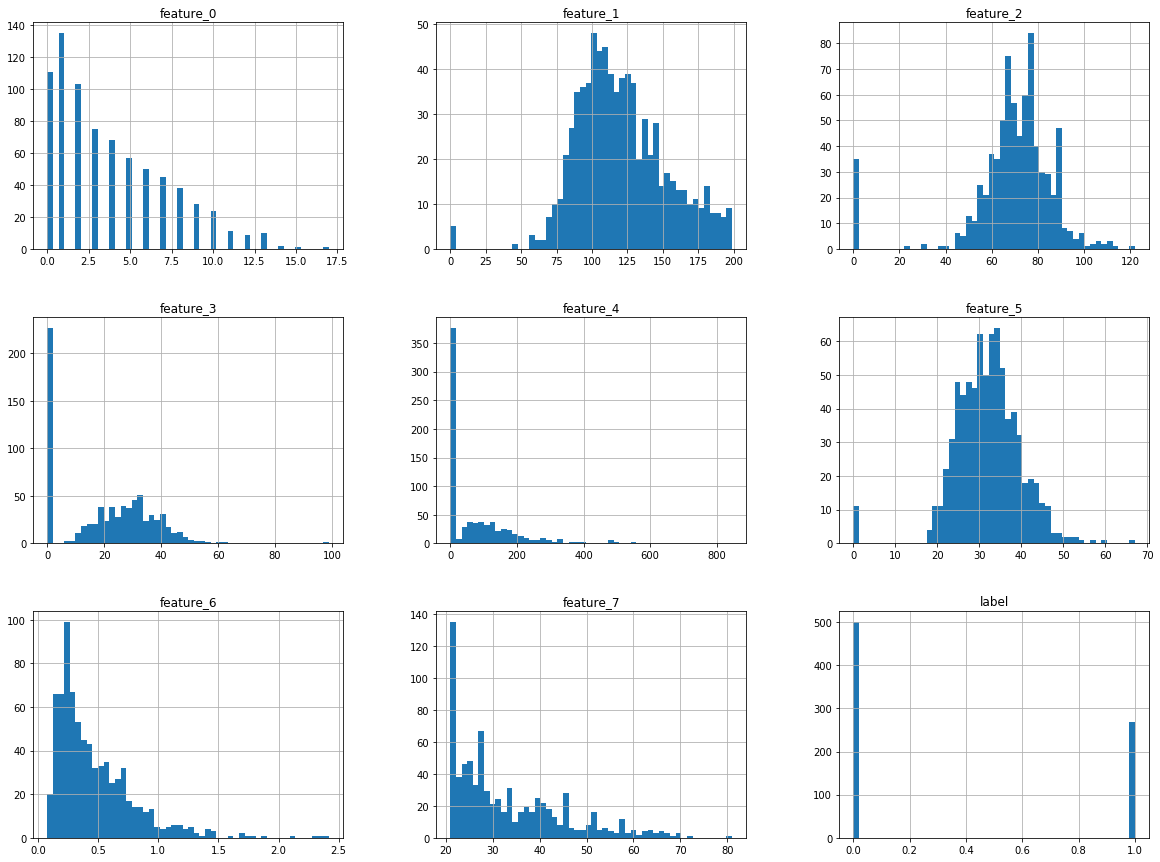

In [30]:
pdfData.hist(bins=50, figsize=(20,15))
plt.show()

#### Before you look at the data any further, you need to create a test set, put it aside, and never look at it.

In [9]:
# Split to train and test set
# Scikit-Learn provides a few functions to split datasets into multiple subsets in various
# ways. The simplest function is train_test_split
trainSet, testSet = train_test_split(pdfData, test_size=0.2, random_state=42)

In [10]:
testSet["feature_0"].value_counts() / len(testSet)

2     0.181818
0     0.129870
1     0.123377
4     0.103896
5     0.077922
3     0.071429
8     0.064935
7     0.064935
9     0.038961
6     0.038961
10    0.032468
13    0.025974
12    0.025974
11    0.019481
Name: feature_0, dtype: float64

In [11]:
trainSet["feature_0"].value_counts() / len(trainSet)

1     0.188925
0     0.148208
2     0.122150
3     0.104235
4     0.084691
5     0.073290
6     0.071661
7     0.057003
8     0.045603
9     0.035831
10    0.030945
11    0.013029
13    0.009772
12    0.008143
14    0.003257
15    0.001629
17    0.001629
Name: feature_0, dtype: float64

In [ ]:
# This is generally fine if your dataset is large enough 
# (especially relative to the number of attributes), but if it
# is not, you run the risk of introducing a significant sampling bias
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for trainIndex, testIndex in split.split(pdfData, pdfData["feature_0"]):
    stratTrainSet = pdfData.loc[trainIndex]
    stratTestSet = pdfData.loc[testIndex]

In [ ]:
stratTrainSet["feature_0"].value_counts() / len(stratTrainSet)

In [ ]:
stratTestSet["feature_0"].value_counts() / len(stratTestSet)

#### Visualize data to gain insights

In [ ]:
# Look for correlation
corrMatrix = pdfData.corr()

In [14]:
corrMatrix["label"].sort_values(ascending=False)

label        1.000000
feature_1    0.466581
feature_5    0.292695
feature_7    0.238356
feature_0    0.221898
feature_6    0.173844
feature_4    0.130548
feature_3    0.074752
feature_2    0.065068
Name: label, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2546b1d0>,
      dtype=object)

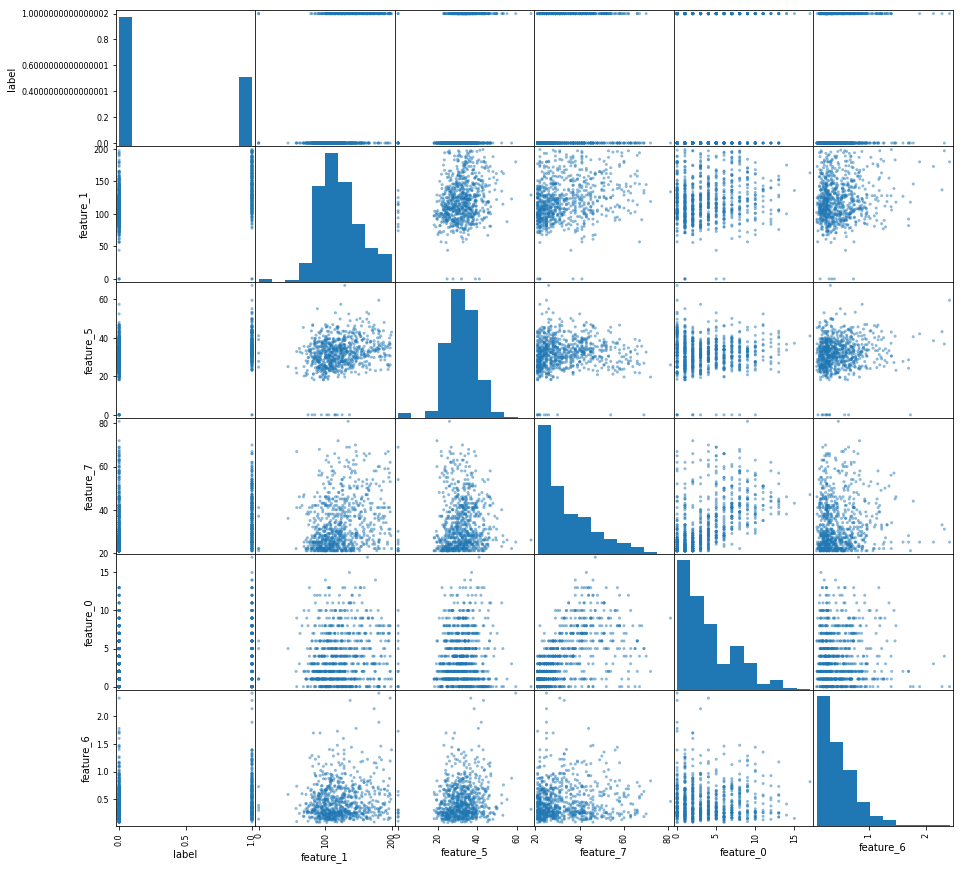

In [20]:
attributes = ["label"] + ["feature_%d"%i for i in [1, 5, 7, 0, 6]]
scatter_matrix(pdfData[attributes], figsize=(15, 15))

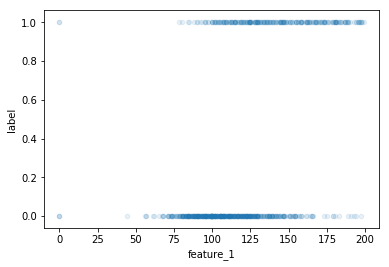

In [19]:
pdfData.plot(kind="scatter", x="feature_1", y="label", alpha=0.1)

#### Prepare data for ML Algorithms

It’s time to prepare the data for your Machine Learning algorithms. Instead of just doing this manually, you should write functions to do that, for several good reasons:  
• This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).  
• You will gradually build a library of transformation functions that you can reuse in future projects.  
• You can use these functions in your live system to transform the new data before feeding it to your algorithms.  
• This will make it possible for you to easily try various transformations and see which combination of transformations works best.  

In [21]:
## Prepare a copy of trainSet
training = trainSet.drop("label", axis=1)
trainingLabel = trainSet["label"].copy()

### Data cleaning: 
- At the moment, the data is full and cleaned, thus we do not have to do this step

### Handling Text and Categorical Attributes

### Custom Transformers

### Feature Scaling
- One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.  
- There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.  

### Select and Train a Model

In [22]:
from sklearn.linear_model import LinearRegression 

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
import numpy as np

In [23]:
## Training and Evaluating on the Training Set
linReg = LinearRegression()
linReg.fit(training, trainingLabel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
someData = training.iloc[:5]
someLabels = trainingLabel.iloc[:5]
# someData_prepared = full_pipeline.transform(someData)
print("Predictions:", linReg.predict(someData))
print("Labels:", list(someLabels))

Predictions: [-0.28511237  0.49188177  0.37337109  0.62171637  0.62167671]
Labels: [0, 1, 0, 0, 1]


In [28]:
## Measure this regression model’s RMSE on the whole training set 
#  Using Scikit-Learn’s mean_squared_error function
predictions = linReg.predict(training)
linMse = mean_squared_error(trainingLabel, predictions) 
linRmse = np.sqrt(linMse)
print(linRmse)

0.3967932102824527


### Better Evaluation Using Cross-Validation

In [31]:
def displayScores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    return

#### Reference:
List of scoring methods  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

#### Linear Regression

In [38]:
# K-fold estimator, scoring="neg_mean_squared_error"
scores = cross_val_score(linReg, training, trainingLabel,
                         scoring="neg_mean_squared_error", cv=5)
linRmseScores = np.sqrt(-scores)
displayScores(linRmseScores)

Scores: [0.40900805 0.40103236 0.40837616 0.39147549 0.40890241]
Mean: 0.40375889417299426
Standard deviation: 0.006835857190711803


In [40]:
# K-fold estimator, scoring="roc_auc"
linAucScores = cross_val_score(linReg, training, trainingLabel,
                         scoring="roc_auc", cv=5)
displayScores(linAucScores)

Scores: [0.80357143 0.85050392 0.8387458  0.82778127 0.8306383 ]
Mean: 0.8302481432260593
Standard deviation: 0.015494459913603313


#### Gaussian Naive Bayes

In [33]:
# Prepare Gaussian Naive Bayes Classifier
gaussianNb = GaussianNB()
# gaussianNb.fit(xTrain, yTrain)

In [49]:
gassianNbAccScore = cross_val_score(gaussianNb, training, trainingLabel,
                                 scoring="accuracy", cv=5)
# gassianNbRmseScores = np.sqrt(-gassianNbScore)
displayScores(gassianNbAccScore)

Scores: [0.73387097 0.78861789 0.7398374  0.72131148 0.7704918 ]
Mean: 0.750825906196661
Standard deviation: 0.024876897418523905


In [37]:
gassianNbScore = cross_val_score(gaussianNb, training, trainingLabel,
                                 scoring="neg_mean_squared_error", cv=5)
gassianNbRmseScores = np.sqrt(-gassianNbScore)
displayScores(gassianNbRmseScores)

Scores: [0.51587695 0.45976311 0.51006137 0.52790958 0.47907014]
Mean: 0.4985362297477726
Standard deviation: 0.025213516855349623


In [41]:
# K-fold estimator
gassianNbAucScores = cross_val_score(gaussianNb, training, trainingLabel,
                         scoring="roc_auc", cv=5)
displayScores(gassianNbAucScores)

Scores: [0.75050244 0.82587209 0.82325581 0.78392857 0.84583333]
Mean: 0.8058784504327139
Standard deviation: 0.03419476815904256


#### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier

In [52]:
forestClassifier = RandomForestClassifier()
# forestReg.fit(training, trainingLabel)

In [53]:
forestClassifierAccScore = cross_val_score(forestClassifier, training, trainingLabel,
                                    scoring="accuracy", cv=5)
# gassianNbRmseScores = np.sqrt(-gassianNbScore)
displayScores(forestClassifierAccScore)

Scores: [0.73387097 0.80487805 0.75609756 0.74590164 0.74590164]
Mean: 0.7573299712373116
Standard deviation: 0.024794664336572462


In [54]:
# K-fold estimator
forestClassifierAucScores = cross_val_score(forestClassifier, training, trainingLabel,
                                     scoring="roc_auc", cv=5)
displayScores(forestClassifierAucScores)

Scores: [0.7881137  0.85363372 0.78197674 0.77589286 0.82931548]
Mean: 0.8057864987080101
Standard deviation: 0.030383652380450814


### Evaluate Your System on the Test Set

In [47]:
finalModel = gaussianNb
finalModel.fit(training, trainingLabel)

GaussianNB(priors=None)

In [48]:
test = testSet.drop("label", axis=1)
testLabel = testSet["label"].copy()
finalPredictions = finalModel.predict(test)
finalMse = mean_squared_error(testLabel, finalPredictions) 
finalRmse = np.sqrt(finalMse) # => evaluates to 47,730.2
print(finalRmse)

0.48349377841522817


In [ ]:
#TODO:
Pipepline
Compare method for classifier performance